# 3 Method

## 3.1 The Noise Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### パラメータ一覧
<p>以下のパラメータは仮の値を入れております。</p>

In [2]:
alpha = 0.5    # 量子効率(quantum efficiency factor)
gain = 10      # アナログゲイン(analog gain)
sigma_d = 5    # ダークノイズの分散
sigma_r = 5    # 読み出し及び量子化ノイズの分散

<p>各素子に入射する予想光子数 U_exp(論文中のu*) は、仮の値として下図"U_exp image"のようなグラデーションの2次元配列を100枚与えました。</p>
<p>下図"U_exp profile"には1行目の値をプロットして値の変化を可視化しています。</p>

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]


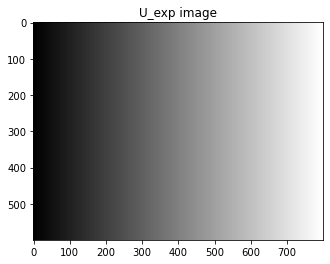

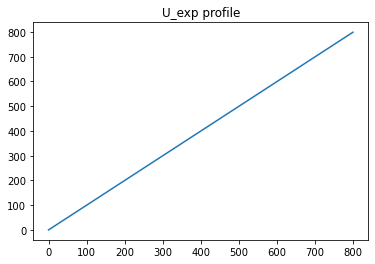

In [3]:
imgsize = (100, 600, 800)   # 画像枚数,縦サイズ,横サイズ
U_exp = np.tile(np.arange(0,imgsize[2]),(imgsize[0],imgsize[1],1))    # 各素子に入射する予想光子数(論文中のu*)

print(U_exp[0])
plt.title('U_exp image')
plt.imshow(U_exp[0], 'gray')
plt.show()
plt.title('U_exp profile')
plt.plot(U_exp[0,0,:])
plt.show()

### 式(1)の実装
<p>x* = gαu*</p>
<p>ノイズが含まれないため、上図"U_exp image","U_exp profile"と同様の分布になっています。<p>

[[   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 ...
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]]


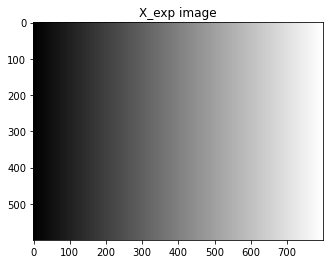

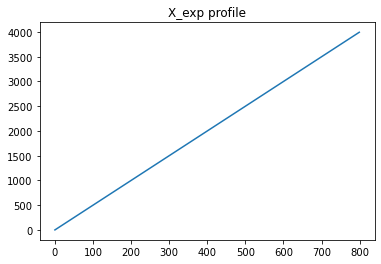

In [4]:
X_exp = gain * alpha * U_exp    # 論文中のx*

print(X_exp[0])
plt.title('X_exp image')
plt.imshow(X_exp[0], 'gray')
plt.show()
plt.title('X_exp profile')
plt.plot(X_exp[0,0,:])
plt.show()

### 式(3)の実装
<p>u ~ P(u*)</p>
<p>"U_act profile"から、u*が大きくなるにつれ、uのばらつきも大きくなることがわかる。<p>

[[  0   1   3 ... 780 780 783]
 [  0   3   1 ... 800 786 774]
 [  0   1   4 ... 782 782 792]
 ...
 [  0   2   4 ... 800 749 771]
 [  0   2   2 ... 789 767 788]
 [  0   1   2 ... 852 794 820]]


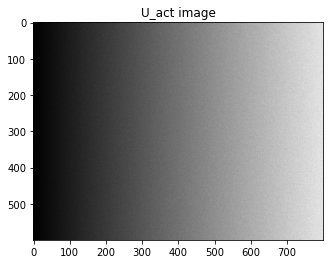

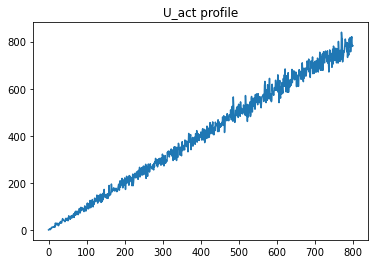

In [5]:
U_act = np.random.poisson(U_exp)    # 実際の光子の吸収量(論文中のu)

print(U_act[0])
plt.title('U_act image')
plt.imshow(U_act[0], 'gray')
plt.show()
plt.title('U_act profile')
plt.plot(U_act[0,0,:])
plt.show()

### 式(5)の実装
<p>x = kP(x*/k) + N(0,σ2)</p>

In [6]:
# 置換
k = gain * alpha
sigma2 = gain**2 * sigma_d**2 + sigma_r**2
print(f'k: {k}, sigma2: {sigma2}')

k: 5.0, sigma2: 2525


#### ポアソンノイズの項
<p>kP(x*/k)</p>

[[   0.    5.    0. ... 3990. 3995. 3980.]
 [   0.    5.   15. ... 3970. 4080. 4190.]
 [   0.    5.   20. ... 3900. 4070. 4175.]
 ...
 [   0.    0.   15. ... 3835. 4045. 4205.]
 [   0.    5.    5. ... 3790. 3950. 3915.]
 [   0.    0.   20. ... 3885. 4000. 4165.]]


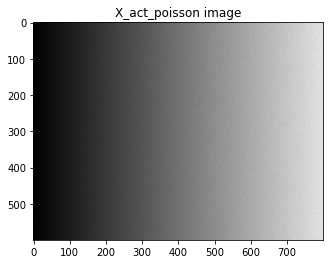

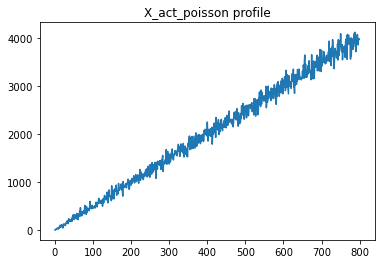

In [7]:
X_act_poisson = k * np.random.poisson(X_exp / k)    # 式(5) ポアソンノイズの項

print(X_act_poisson[0])
plt.title('X_act_poisson image')
plt.imshow(X_act_poisson[0], 'gray')
plt.show()
plt.title('X_act_poisson profile')
plt.plot(X_act_poisson[0,0,:])
plt.show()

#### ガウシアンノイズの項
<p>N(0,σ2)</p>

[[ 50.9977768    5.84703267 -43.10769352 ...  17.43296663  25.90364125
   32.51695826]
 [ 60.95374776   5.40872816 -21.3950771  ... -41.62637269  35.04835014
  -62.58606313]
 [-14.78800577  57.84876338  26.36932754 ...  35.33285183  11.78340623
  -22.6347767 ]
 ...
 [-65.33233128  61.95103049  29.76884528 ...  11.59723369   8.75726692
   63.02011493]
 [ 48.55812845   8.27932611   6.67118036 ... -10.10024537 -12.33542368
   -2.82951146]
 [ -1.57789275  55.92578074   9.60596679 ...  36.07563785  44.46822727
  -30.27862731]]


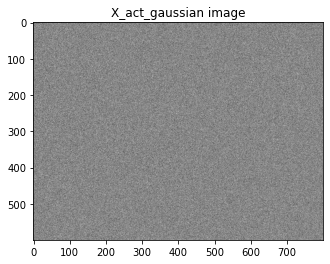

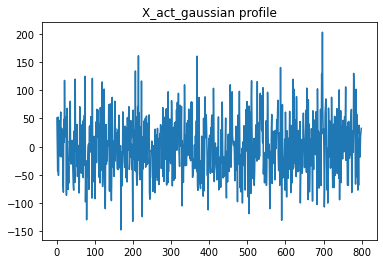

In [8]:
X_act_gaussian = np.random.normal(0, np.sqrt(sigma2), imgsize)    # 式(5) ガウシアンノイズの項

print(X_act_gaussian[0])
plt.title('X_act_gaussian image')
plt.imshow(X_act_gaussian[0], 'gray')
plt.show()
plt.title('X_act_gaussian profile')
plt.plot(X_act_gaussian[0,0,:])
plt.show()

#### 両ノイズを加算する

[[ 5.09977768e+01  1.08470327e+01 -4.31076935e+01 ...  4.00743297e+03
   4.02090364e+03  4.01251696e+03]
 [ 6.09537478e+01  1.04087282e+01 -6.39507710e+00 ...  3.92837363e+03
   4.11504835e+03  4.12741394e+03]
 [-1.47880058e+01  6.28487634e+01  4.63693275e+01 ...  3.93533285e+03
   4.08178341e+03  4.15236522e+03]
 ...
 [-6.53323313e+01  6.19510305e+01  4.47688453e+01 ...  3.84659723e+03
   4.05375727e+03  4.26802011e+03]
 [ 4.85581284e+01  1.32793261e+01  1.16711804e+01 ...  3.77989975e+03
   3.93766458e+03  3.91217049e+03]
 [-1.57789275e+00  5.59257807e+01  2.96059668e+01 ...  3.92107564e+03
   4.04446823e+03  4.13472137e+03]]


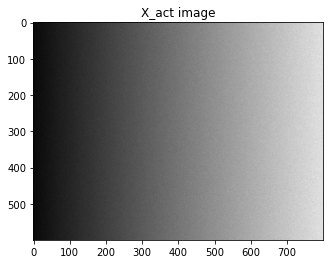

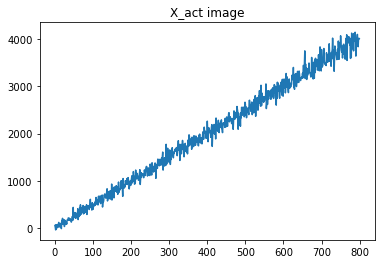

In [9]:
X_act = X_act_poisson + X_act_gaussian

print(X_act[0])
plt.title('X_act image')
plt.imshow(X_act[0], 'gray')
plt.show()
plt.title('X_act image')
plt.plot(X_act[0,0,:])
plt.show()

## 3.2 Parameter Estimation

<p>3.1 Noise modelが正しく実装されているかを確認する。</p>

#### 平均を求める
<p>100枚の画像を平均した画像を下図"X_act_mean image"に示す。</p>

[[ 3.27350651e+00  2.74275729e+00  1.02165807e+01 ...  4.00294454e+03
   4.00025318e+03  3.99712434e+03]
 [ 7.33013997e+00 -8.27581346e+00  1.01924417e+01 ...  4.00377219e+03
   3.98070353e+03  4.00200731e+03]
 [ 2.98269071e+00  5.18677436e+00  7.48542242e+00 ...  3.98092362e+03
   3.98301658e+03  4.01196337e+03]
 ...
 [ 4.02305404e-01  8.85820566e+00  1.31070620e+01 ...  3.95825822e+03
   4.00634143e+03  3.99482211e+03]
 [ 9.96934741e+00  5.88131658e+00  9.34152434e+00 ...  3.97849642e+03
   3.97527524e+03  4.00696180e+03]
 [-3.26005911e+00  1.06161652e+01  1.19637968e+01 ...  3.97598948e+03
   3.99929290e+03  3.99856164e+03]]


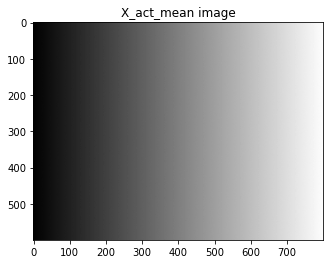

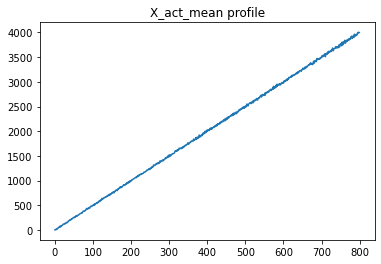

In [10]:
X_act_mean = np.mean(X_act, axis=0)

print(X_act_mean)
plt.title('X_act_mean image')
plt.imshow(X_act_mean, 'gray')
plt.show()
plt.title('X_act_mean profile')
plt.plot(X_act_mean[0,:])
plt.show()

#### 分散を求める

<p>100枚の画像について、同じ画素位置の値の分散を求める。</p>
<p>平均と分散をプロットすると"X_act_var profile"のようになる。</p>

[[ 2275.02320568  1893.43743501  2048.98905974 ... 28681.17287195
  18004.15812819 19706.25195838]
 [ 2003.71796533  1952.66583276  2649.38966942 ... 23197.52784434
  28110.92361303 21030.095134  ]
 [ 2803.82169897  2352.67767339  2872.55894979 ... 19007.22405092
  18950.17167295 24721.35926373]
 ...
 [ 2762.04841172  1930.03009694  2253.15917754 ... 22242.00442822
  16640.82677436 20448.34082808]
 [ 2685.0449243   3145.72759566  3386.17669897 ... 24615.624705
  19121.30373038 20721.74483663]
 [ 2419.83338655  2474.24840414  2916.38101279 ... 24011.06049867
  22890.62960773 20197.61081527]]


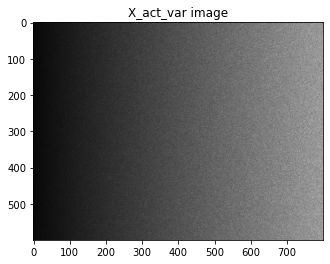

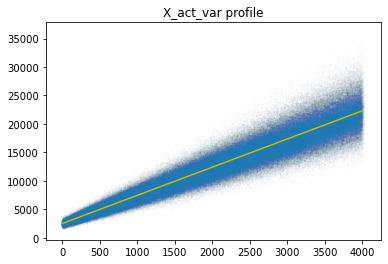

In [11]:
X_act_var = np.var(X_act, axis=(0))
print(X_act_var)
plt.title('X_act_var image')
plt.imshow(X_act_var, 'gray')
plt.show()
plt.title('X_act_var profile')
plt.scatter(X_act_mean.flatten(),X_act_var.flatten(),s=1,alpha=0.01)
config = np.polyfit(X_act_mean.flatten(),X_act_var.flatten(),1)
x = np.array([0,4000])
y = np.poly1d(config)(x)
plt.plot(x, y,'y')
plt.show()

#### "k"と"sigma2"を求める
<p>1次近似を行い、"k"と"sigma2"を求めて真値と比較すると近い値になっていることがわかる。</p>
<p>よって3.1 Noise Modelは正しく実装できていることが確認できた。</p>

In [12]:
print(f'k: {k}, sigma2: {sigma2}')
print(f'k_pred: {config[0]}, sigma2_pred: {config[1]}')

k: 5.0, sigma2: 2525
k_pred: 4.951744250145473, sigma2_pred: 2496.3468993609727
